<a href="https://colab.research.google.com/github/yejin0455/sesac-python/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sklearn.datasets import load_iris

In [ ]:
iris_data = load_iris()
iris_data

In [ ]:
data = iris_data['data']
target = iris_data['target']
tnames = iris_data['target_names']
for i, y in enumerate(target):
    print(f'{i}:{tnames[y]}')

In [11]:
sepal_lengths = data[:50, [0]]  #setosa품종의 sepal_length만 추출(독립변수로 사용하기 위해 2차원 배열)
sepal_widths = data[:50, 1]  #setosa품종의 sepal_width만 추출(종속변수로 사용하기 위해 1차원 배열)

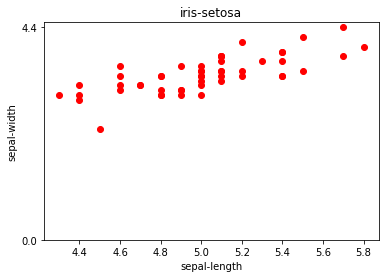

In [12]:
import matplotlib.pyplot as plt
plt.plot(sepal_lengths[:, 0], sepal_widths, 'ro', label='setosa')
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')
plt.yticks([0, max(sepal_widths)])
plt.title('iris-setosa')
plt.show()

In [13]:
train_xs = sepal_lengths[:len(sepal_lengths)*2//3]
train_ys = sepal_widths[:len(sepal_widths)*2//3]
test_xs = sepal_lengths[len(sepal_lengths)*2//3:]
test_ys = sepal_widths[len(sepal_widths)*2//3:]
print(f"학습용 길이:{len(train_ys)} 테스트용 길이:{len(test_ys)}")

학습용 길이:33 테스트용 길이:17


거리 계산

In [14]:
import numpy as np

In [16]:
def distance(x1, x2):
    if isinstance(x1, int) and isinstance(x2, int):  #두 개의 값이 모두 int형식일 때
        return np.abs(x2 - x1)  #차이의 절대값을 반환
    if isinstance(x1, list) and isinstance(x2, list):
        x1 = np.array(x1)
        x2 = np.array(x2)
    return sum((x1-x2)**2)**(1/2)

In [17]:
na1 = np.array([1, 2])
na2 = np.array([4, 6])
distance(na1, na2)

5.0

k개의 가까운 이웃을 찾아라

In [27]:
def find_k_nearest_neighbor(xs, ys, tx, k=5):
    """
    입력매개변수:xs, ys, tx, k
        xs:독립변수(학습데이터)
        ys:종속변수(학습데이터)
        tx:독립변수(예측에 사용할 신입)
        k:찾을 이웃 수
    반환:k개의 이웃의 y의 평균값
    """
    sarr = []
    for i, x in enumerate(xs):
        dis = distance(x, tx)
        sarr.append((dis, i))  #계산한 거리와 인덱스를 보관

    sarr.sort(key=lambda x:x[0])  #dis순으로 정렬
    k = min(k, len(sarr))  #현재 학습데이터 개수와 k 중에 최솟값을 k로 확정
    neighbors = [x[1] for x in sarr[:k]]  #거리가 가까운 이웃 k개의 인덱스로 리스트 구성
    return sum(ys[neighbors])/k  #이웃의 평균 값을 반환

In [28]:
def find_k_nearest_neighbors(xs, ys, t_xs, k=5):
    return [find_k_nearest_neighbor(xs, ys, tx, k) for tx in t_xs]

In [30]:
pred_val = find_k_nearest_neighbors(train_xs, train_ys, test_xs)

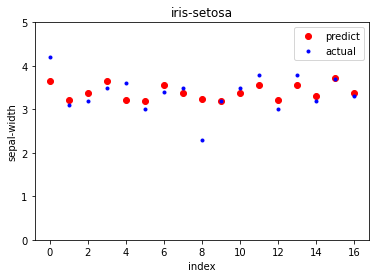

In [31]:
plt.plot(pred_val, 'ro', label='predict')
plt.plot(test_ys, 'b.', label='actual')
plt.ylim(0, 5)
plt.legend()
plt.xlabel("index")
plt.ylabel("sepal-width")
plt.title("iris-setosa")
plt.show()

In [32]:
print(np.mean(np.abs(pred_val-test_ys)/test_ys))

0.07213767474452305


In [33]:
from sklearn.neighbors import KNeighborsRegressor

In [34]:
knr_model = KNeighborsRegressor(n_neighbors=3)  #모델 개체 생성
knr_model.fit(train_xs, train_ys)  #학습하세요
pred_val2 = knr_model.predict(test_xs)  #예측하세요

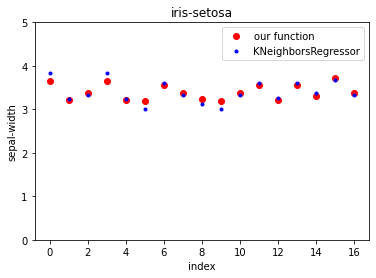

In [35]:
plt.plot(pred_val, 'ro', label='our function')
plt.plot(pred_val2, 'b.', label='KNeighborsRegressor')
plt.ylim(0, 5)
plt.legend()
plt.xlabel("index")
plt.ylabel("sepal-width")
plt.title("iris-setosa")
plt.show()

In [36]:
print(np.mean(np.abs(pred_val2-test_ys)/test_ys))

0.07137028342370126


In [37]:
print(find_k_nearest_neighbor(train_xs, train_ys, [3, 4]))
print(find_k_nearest_neighbor(train_xs, train_ys, [6]))
print(find_k_nearest_neighbor(train_xs, train_ys, [8]))
print(find_k_nearest_neighbor(train_xs, train_ys, [80]))

3.2
3.9599999999999995
3.9599999999999995
3.9599999999999995


KNN에서 독립변수에 특성이 여러 개이고 특성에 따라 크기의 차이가 상당할 때

In [41]:
train_xs2 = np.array([[180, 0.84], [190, 0.89], [120, 0.32], [150, 0.49], [160, 0.58], [170, 0.65]])
train_ys2 = np.array([32, 33, 24, 26, 30, 31])  #허리둘레
print(find_k_nearest_neighbor(train_xs2, train_ys2, [210, 1.10], k=1))
print(find_k_nearest_neighbor(train_xs2, train_ys2, [186, 0.84], k=1))

33.0
33.0


In [42]:
distance([180, 0.84], [186, 0.84]), distance([190, 0.89], [186, 0.84])

(6.0, 4.000312487793923)

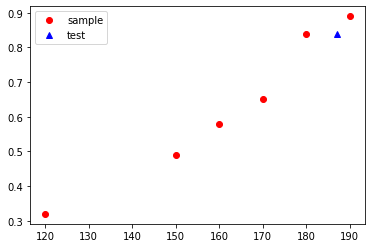

In [40]:
plt.plot(train_xs2[:, 0], train_xs2[:, 1], 'ro', label='sample')
plt.plot([186], [0.84], 'b^', label='test')
plt.legend()
plt.xlim(0, 210)
plt.ylim(0, 1.10)
plt.show()

In [56]:
heights = train_xs2[:, 0]
hm = heights.mean()
hs = heights.std()
heights2 = heights - hm  #수평 이동
heights3 = heights2 / hs  #표준편차만큼 비율 조절

hm3 = heights3.mean()
hs3 = heights3.std()
hm3, hs3

(3.978299171573478e-16, 1.0)

In [57]:
weights = train_xs2[:, 1]
wm = weights.mean()
ws = weights.std()
weights2 = weights - wm  #수평 이동
weights3 = weights2 / ws  #표준편차만큼 비율 조절

wm3 = weights3.mean()
ws3 = weights3.std()
wm3, ws3

(1.3415194880887307e-16, 1.0)

In [58]:
rescaled_train_xs = np.array([ [heights3[i], w] for i, w in enumerate(weights3) ])
rescaled_train_xs

array([[ 0.80873608,  1.08043052],
       [ 1.24986486,  1.33565032],
       [-1.83803656, -1.57385548],
       [-0.51465024, -0.70610813],
       [-0.07352146, -0.24671248],
       [ 0.36760731,  0.11059525]])

In [59]:
h = 186
w = 0.84
w3 = (w-wm)/ws
h3 = (h-hm)/hs
h3, w3

(1.0734133482569597, 1.08043051632241)

In [60]:
print(find_k_nearest_neighbor(rescaled_train_xs, train_ys2, [h3, w3], k=1))

32.0


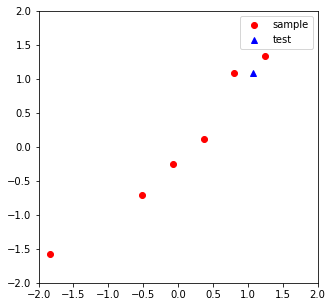

In [61]:
plt.figure(figsize=(5, 5))
plt.plot(rescaled_train_xs[:, 0], rescaled_train_xs[:, 1], 'ro', label='sample')
plt.plot([h3], [w3], 'b^', label='test')
plt.legend()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()